In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# importing preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from nltk.probability import FreqDist
import seaborn as sns
import re
import math
import string
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#from __future__ import division

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data_1=pd.read_pickle('cleaned_df_final.pkl')
data_2=pd.read_csv('textResponses_graded.csv')

In [3]:
len(data_1)-len(data_2)

322

In [4]:
#data_2=data_2.iloc[:1450]
data_2=data_2[['Transaction Id','correctness','answerType']]

In [5]:
data=pd.merge(data_1,data_2,on='Transaction Id')

In [6]:
data.tail()

Row                    Transaction Id  \
7002  1029681  c54a5c28bced19d58961535e46614ad2   
7003  1029721  57973b31d8c3c6e36d2665f6247f6f8b   
7004  1029793  1ac1c571e80971e2f51a8839132b807c   
7005  1030198  e10dce32b913fc822b5df17cb513e16f   
7006  1030200  53406cfa5946f9f896abedeb214aaa55   

                           Anon Student Id                         Session Id  \
7002  Stu_ffe4ba291fd0ec27d27a34dcceb3a617  S112d59de762cb6b27718fd92dc970abc   
7003  Stu_ffe4ba291fd0ec27d27a34dcceb3a617  S112d59de762cb6b27718fd92dc970abc   
7004  Stu_ffe4ba291fd0ec27d27a34dcceb3a617  S112d59de762cb6b27718fd92dc970abc   
7005  Stu_ffe4ba291fd0ec27d27a34dcceb3a617  Sc03f3121c394179d88011f7f77ce420a   
7006  Stu_ffe4ba291fd0ec27d27a34dcceb3a617  Sc03f3121c394179d88011f7f77ce420a   

              Time Duration (sec) Student Response Subtype  \
7002  5/19/16 9:12            8.8                      NaN   
7003  5/19/16 9:13           6.75                 Student1   
7004  5/19/16 9:17          13.75                 Student1   
7005  5/20/16 8:58           47.5                      NaN   
7006  5/20/16 8:59           26.5                      NaN   

                     Level (Assignment)                 Level (ProblemSet)  \
7002  Comparing Erroneous Collaboration  Erroneous_Comparing_Collaboration   
7003  Comparing Erroneous Collaboration  Erroneous_Comparing_Collaboration   
7004  Comparing Erroneous Collaboration  Erroneous_Comparing_Collaboration   
7005            Show what you learned A                       Assessment_A   
7006            Show what you learned A                       Assessment_A   

     Problem Name  ...  CF (Team Position)  \
7002           6a  ...              1 of 2   
7003           7a  ...              1 of 2   
7004           8a  ...              1 of 2   
7005            5  ...                 NaN   
7006            6  ...                 NaN   

                            CF (collaborating_sessions) CF (step_id)  \
7002  S7c153e885bb28b9baeb781b48cbd5527,S112d59de762...         32.0   
7003  S7c153e885bb28b9baeb781b48cbd5527,S112d59de762...         32.0   
7004  S7c153e885bb28b9baeb781b48cbd5527,S112d59de762...         32.0   
7005                                                NaN        236.0   
7006                                                NaN        236.0   

             CF (tool_event_time)        CF (tutor_event_time)  \
7002  2016-05-19 13:12:37.259 UTC  2016-05-19 13:12:37.275 UTC   
7003   2016-05-19 13:13:55.28 UTC   2016-05-19 13:13:55.28 UTC   
7004  2016-05-19 13:17:01.843 UTC  2016-05-19 13:17:01.859 UTC   
7005  2016-05-20 12:58:53.910 UTC  2016-05-20 12:58:53.911 UTC   
7006  2016-05-20 12:59:54.615 UTC  2016-05-20 12:59:54.633 UTC   

                                              word_list  num_list symb_list  \
7002       [use, the, same, least, common, denominator]        []        []   
7003                       [don't, add, the, numerator]        []        []   
7004  [the, larger, denominator, does, not, always, ...        []        []   
7005  [it, cannot, be, 6/13, FRACTION, because, of, ...   [6, 13]       [/]   
7006  [32/65, FRACTION, be, smaller, because, it, be...  [32, 65]       [/]   

     correctness answerType  
7002           0        NaN  
7003           0        NaN  
7004           0        NaN  
7005           1          v  
7006           1          p  

[5 rows x 35 columns]

In [7]:
data.columns

Index(['Row', 'Transaction Id', 'Anon Student Id', 'Session Id', 'Time',
       'Duration (sec)', 'Student Response Subtype', 'Level (Assignment)',
       'Level (ProblemSet)', 'Problem Name', 'Problem View',
       'Problem Start Time', 'Step Name', 'Attempt At Step', 'Is Last Attempt',
       'Outcome', 'Selection', 'Input', 'Input.1', 'KC (Default)',
       'KC (Unique-step)', 'School', 'Class', 'CF (Completion History)',
       'CF (Team ID)', 'CF (Team Position)', 'CF (collaborating_sessions)',
       'CF (step_id)', 'CF (tool_event_time)', 'CF (tutor_event_time)',
       'word_list', 'num_list', 'symb_list', 'correctness', 'answerType'],
      dtype='object')

In [8]:
data['Attempt At Step'].value_counts()

1     6712
2      160
3       37
4       36
6       22
5        8
7        7
9        5
10       4
8        4
14       2
23       2
13       2
11       2
12       2
24       1
27       1
Name: Attempt At Step, dtype: int64

In [9]:
data['answerType'].value_counts().index

Index(['p', 'c', 'n', 'u', 'v', 'c '], dtype='object')

In [10]:
for i in range(len(data)):
    if data.answerType[i]=='c ':
        data.answerType[i]='c'

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

In [12]:
all_words=[]
for i in range(len(data)):
    temp_word_list=data.word_list[i]
    for temp_word in temp_word_list:
        if not (temp_word in all_words):
            all_words.append(temp_word)
               

In [13]:
data['answer']=''
for i in range(len(data)):
    temp_word_list=data.word_list[i]
    temp_answer=''
    for temp_word in temp_word_list:
        temp_answer=temp_answer+temp_word+' '
    temp_answer=temp_answer[:-1]
    data['answer'][i]=temp_answer

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
data.answer[1]

'i do not know the answer'

In [15]:
select_rows=[]
for i in range(len(data)):
    if data.answerType[i] in ['p','c','n','u','v']:
        select_rows.append(i)
data=data.iloc[select_rows]

In [16]:
data.correctness.value_counts()

1    900
0    548
Name: correctness, dtype: int64

In [17]:
data.answerType.value_counts()

p    888
c    268
n    143
u     75
v     74
Name: answerType, dtype: int64

In [18]:
from nltk.util import ngrams

In [19]:
all_word_comb=[]
data['ngrams']=''
for i in range(len(data)):
    for word_comb in ngrams(data.word_list.iloc[i],3):
        temp_comb=' '
        for temp_word in word_comb:
            temp_comb=temp_comb+temp_word+' '
        if not(temp_comb in all_word_comb):
            all_word_comb.append(temp_comb[:-1])



In [20]:
all_word_comb=[]
data['ngrams']=''
for i in range(len(data)):
    temp_list=[]
    for word_comb in ngrams(data.word_list.iloc[i],3):    
        temp_list.append(word_comb)
        data['ngrams'].iloc[i]=temp_list


D:\anaconda\envs\torch\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
ngram_vector=[]
for i in range(len(data)):
    temp_vector=[]
    for temp_comb in all_word_comb:
        if temp_comb in data.answer.iloc[i]:
            temp_vector.append(1)
        else:
            temp_vector.append(0)
    ngram_vector.append(temp_vector)


In [22]:
len(all_word_comb)

0

In [23]:
word_comb[0]

'a'

In [24]:
f_train = data.iloc[:1399][ 'ngrams'].values

In [25]:
f_train[0]

[('no', 'because', 'you'),
 ('because', 'you', "don't"),
 ('you', "don't", 'change'),
 ("don't", 'change', 'the'),
 ('change', 'the', 'denominator'),
 ('the', 'denominator', 'so'),
 ('denominator', 'so', 'the'),
 ('so', 'the', 'why'),
 ('the', 'why', 'the'),
 ('why', 'the', 'answer'),
 ('the', 'answer', 'be'),
 ('answer', 'be', 'wrong')]

In [26]:
comb_dict={}
data['ngrams_answer']=''
for i in range(len(data)):
    temp_answer=''
    for word_comb in ngrams(data.word_list.iloc[i],3):
        temp_comb=''
        temp_words=''
        for temp_word in word_comb:
            temp_comb=temp_comb+temp_word
            temp_words=temp_words+temp_word+' '
        comb_dict[temp_comb]=temp_words[:-1]
        temp_answer=temp_answer+temp_comb+' '
    data['ngrams_answer'].iloc[i]=temp_answer[:-1]

# Naive Bayes

In [27]:
f_train = data.iloc[:1352][ 'answer'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'answer'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [28]:
#tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=10, max_features=1000, stop_words='english', ngram_range=(1,5))

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( max_df=0.90, min_df=10, max_features=100,stop_words='english',ngram_range=(1,5))
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)
print(train_vectors.shape, test_vectors.shape)

(1352, 100) (95, 100)


In [30]:
'''
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)
print(train_vectors.shape, test_vectors.shape)
'''

'\nfrom sklearn.feature_extraction.text import TfidfTransformer\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nvectorizer = TfidfVectorizer()\ntrain_vectors = vectorizer.fit_transform(f_train)\ntest_vectors = vectorizer.transform(f_test)\nprint(train_vectors.shape, test_vectors.shape)\n'

In [31]:
from  sklearn.metrics  import accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with bayes classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with bayes classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with bayes classifier: 0.7052631578947368
f1 score of correctness classification with bayes classifier: 0.7586206896551724


### answer type

In [32]:
clf = MultinomialNB().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with bayes classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with bayes classifier: '+str(f1_score(c_test,predicted)))

accuracy of answer type classification with bayes classifier: 0.7052631578947368


#  Bernoulli

In [33]:
f_train = data.iloc[:1352][ 'answer'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'answer'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,5))
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [35]:
from  sklearn.metrics  import accuracy_score, f1_score
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with Bernoulli classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with Bernoulli classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with Bernoulli classifier: 0.6947368421052632
f1 score of correctness classification with Bernoulli classifier: 0.7716535433070867


### answer type

In [36]:
clf = BernoulliNB().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with Bernoulli classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with bayes classifier: '+str(f1_score(c_test,predicted)))

accuracy of answer type classification with Bernoulli classifier: 0.6526315789473685


# Tfidf and logistic regression with proccessed answer

In [37]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

In [38]:
f_train = data.iloc[:1352][ 'answer'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'answer'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.90, min_df=10, max_features=100,stop_words='english',ngram_range=(1,5))
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [40]:
from  sklearn.metrics  import accuracy_score, f1_score
clf = LogisticRegression().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with logistic classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with logistic classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with logistic classifier: 0.7789473684210526
f1 score of correctness classification with logistic classifier: 0.8108108108108109


D:\anaconda\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### answer type

In [41]:
from  sklearn.metrics  import accuracy_score, f1_score
clf = LogisticRegression().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with logistic classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of correctness classification with logistic classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with logistic classifier: 0.7368421052631579


D:\anaconda\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# tdidf and support vector machine for processed answer

In [42]:
f_train = data.iloc[:1352][ 'answer'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'answer'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( max_df=0.90, min_df=10, max_features=100, ngram_range=(1,5))
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [44]:
clf = LinearSVC().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with svc classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with svc classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with svc classifier: 0.8315789473684211
f1 score of correctness classification with svc classifier: 0.8545454545454546


### answer type

In [45]:
clf = LinearSVC().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with svc classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with svc classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with svc classifier: 0.7368421052631579


### analysis of error features

In [46]:
features = data['answer'].values
at_labels = data['answerType'].values

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( max_df=0.90, min_df=10, max_features=100, ngram_range=(1,5))
feature_vectors = vectorizer.fit_transform(features)
clf = LinearSVC().fit(feature_vectors, at_labels)
predicted = clf.predict(feature_vectors)

In [48]:
len(at_labels)-len(predicted)

0

In [49]:
def visualize_error_features(true_labels, predict_labels, gt, pred):
    print('Ture Label is: '+ str(gt))
    print('But Predicted Label is: ' +str(pred))
    for i in range(len(true_labels)):
        if true_labels[i]==gt and predict_labels[i]==pred:
            print(features[i])

In [50]:
visualize_error_features(at_labels,predicted,'c','p' )

Ture Label is: c
But Predicted Label is: p
it be larger because 21 NUMBER be bigger
because the denominator be larger it make up less space
32/65 FRACTION be smaller then 32/45 FRACTION because 32/45 FRACTION be closer to the whole
32/65 FRACTION be smaller because the numerator be the same but 32/45 FRACTION be a smaller denominator there for there be a smaller space to fill
the two numerator be the same but 15/21 FRACTION be a smaller denominator so there be less space to fill
the denominator 65 NUMBER be greater than the denominator 45 NUMBER so there be more way to fill in 65 NUMBER but less in 45 NUMBER
the denominator be smaller and the numerator be the same the numerator make up more space
it be greater because 21 NUMBER be smaller than 24 NUMBER so the many the there be a smaller space be fill up
because 65 NUMBER be larger than 45 NUMBER so 65 NUMBER be a smaller space
32/65 FRACTION be smaller than 32/45 FRACTION because you be divide 32 NUMBER amount 65 NUMBER part so the pa

In [38]:
visualize_error_features(at_labels,predicted,'n','p' )

Ture Label is: n
But Predicted Label is: p
32 NUMBER be smaller because 45 NUMBER be
15 NUMBER over 21 NUMBER be bigger because
first the denominator
the be not right because add fraction isn't as easy as the
because it be
no because
EQUATION don't = 6/13 FRACTION
the first fraction be bigger
because i dont know
3 NUMBER
15/21 FRACTION be 15 NUMBER out of 21 NUMBER and 15/24 FRACTION be 15 NUMBER out of 24 NUMBER
you need to get smaller
it be not larger 21 NUMBER be not
she add some work to show she get it
1 NUMBER
and what you be trying to ask me
i think she be wrong because
i think she be wrong because she be - 7-3=4 EQUATION and 9-4=5 EQUATION
32 NUMBER it be bigger than 32 NUMBER 65ths NUMBER
i dont think it be smaller than 32/65 FRACTION
she did show the correct fraction from her equation


In [39]:
visualize_error_features(at_labels,predicted,'p','c' )

Ture Label is: p
But Predicted Label is: c
because 24 NUMBER be larger than 21 NUMBER you need to fill in more to 24 NUMBER
it larger than 15/24 FRACTION because the less the number be the bigger the answer and the bigger the problem be going have a less answer answer
because there be 65 NUMBER piece in the first one but 45 NUMBER in the second
32/65 FRACTION be smaller because the bigger it get the smaller it be
the bigger the denominator the smaller the piece
the be right because 32/65 FRACTION be far apart than 32/45 FRACTION so with the said 32/45 FRACTION be bigger
because the bigger the denominator the smaller the piece
on 32/65 FRACTION it be less than half and 32/45 FRACTION be more than half so 32/45 FRACTION be bigger
be case the bottom
because go 21 NUMBER to more times
it be smaller because 32/65 FRACTION be a bigger denominator . also because it need NUMBER more to make a whole as 32/45 FRACTION need more to make a whole
cause if you multiply in an equation of and 21 NUMBE

In [41]:
visualize_error_features(at_labels,predicted,'u','v' )

Ture Label is: u
But Predicted Label is: v
because it don't thing what the amount the number be it just thing what it show in a picture
no she be not correct because she did not to the math correctly instead she add the numerator 2 NUMBER in 2/8 FRACTION and she add the 4 NUMBER in 4/5 FRACTION and get the 6 NUMBER as in 6/13 FRACTION then she add the denominator the 8 NUMBER in 2/8 FRACTION and the 5 NUMBER in 4/5 FRACTION and then she add 5 NUMBER plus the 8 NUMBER and get 13 NUMBER the be not the correct way to do it her picture be correct she shade the correct part and she did not shade any rectangle square she also had the right amount of part divide be math be wrong but for the not correct math her picture should 2/8 FRACTION with 2 NUMBER out of 8 NUMBER shade and in 4/5 FRACTION she be 4 NUMBER out of 5 NUMBER piece shade her not correct answer 6/13 FRACTION be shade correctly also be be half correct and half not
i think the she be to look at her fraction and see i f she be all

# TFIDF and decision tree for processed answer

In [51]:
f_train = data.iloc[:1352][ 'answer'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'answer'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.90, min_df=10, max_features=100, ngram_range=(1,5))
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
clf = DecisionTreeClassifier().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with decision tree: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with decision tree: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with decision tree: 0.7157894736842105
f1 score of correctness classification with decision tree: 0.7428571428571428


### answer type

In [55]:
clf = DecisionTreeClassifier().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with decision tree: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with svc classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with decision tree: 0.6526315789473685


In [56]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(at_test,predicted))

              precision    recall  f1-score   support

           c       0.50      0.80      0.62         5
           n       0.67      0.75      0.71         8
           p       0.89      0.77      0.83        31
           u       0.00      0.00      0.00         2
           v       0.00      0.00      0.00         1

    accuracy                           0.72        47
   macro avg       0.41      0.46      0.43        47
weighted avg       0.75      0.72      0.73        47



# TFIDF and random forest for processed answer

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
f_train = data.iloc[:1352][ 'answer'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'answer'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.90, min_df=10, max_features=100, ngram_range=(1,5))
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [60]:
clf = RandomForestClassifier().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with decision tree: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with decision tree: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with decision tree: 0.7473684210526316
f1 score of correctness classification with decision tree: 0.7692307692307692


D:\anaconda\envs\torch\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### answer type

In [61]:
clf = RandomForestClassifier().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with decision tree: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with svc classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with decision tree: 0.6947368421052632


D:\anaconda\envs\torch\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## most informative features in classification: 3 ngrams

In [20]:
comb_dict={}
data['ngrams_answer']=''
for i in range(len(data)):
    temp_answer=''
    for word_comb in ngrams(data.word_list.iloc[i],3):
        temp_comb=''
        temp_words=''
        for temp_word in word_comb:
            temp_comb=temp_comb+temp_word
            temp_words=temp_words+temp_word+' '
        comb_dict[temp_comb]=temp_words[:-1]
        temp_answer=temp_answer+temp_comb+' '
    data['ngrams_answer'].iloc[i]=temp_answer[:-1]

D:\anaconda\envs\ntds\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
f_train = data.iloc[:1399][ 'ngrams_answer'].values
c_train = data.iloc[:1399]['correctness'].values
at_train = data.iloc[:1399][ 'answerType'].values
f_test = data.iloc[1400:][ 'ngrams_answer'].values
c_test = data.iloc[1400:]['correctness'].values
at_test = data.iloc[1400:]['answerType'].values

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [27]:
def get_tfidf_dic(array):
    temp_dict={}
    names=vectorizer.get_feature_names()
    for i in range(len(names)):
        temp_dict[names[i]]=array[i]
    return temp_dict

In [28]:
train_set=[(get_tfidf_dic(train_vectors.toarray()[i]), at_train[i])  for i in range(train_vectors.shape[0])]

In [29]:
dt_cls=nltk.NaiveBayesClassifier.train(train_set)

In [30]:
dt_cls.show_most_informative_features(5)

Most Informative Features
         smallerthepiece = 0.48923353005097703      c : p      =      7.5 : 1.0
    biggerthedenominator = 0.4377444802515247      c : p      =      7.4 : 1.0
   denominatorthesmaller = 0.4142777525269943      c : p      =      7.4 : 1.0
            thebiggerthe = 0.3848628354544324      c : p      =      7.2 : 1.0
           thesmallerthe = 0.36146758134991147      c : p      =      7.2 : 1.0


In [31]:
info_f=dt_cls.most_informative_features(1000)

In [32]:
info_fs=[]
for temp in info_f:
    temp_comb=temp[0]
    try:
        info_fs.append(comb_dict[temp_comb])
    except:
        continue

In [33]:
info_fs

['smaller the piece',
 'bigger the denominator',
 'denominator the smaller',
 'the bigger the',
 'the smaller the',
 'the denominator the',
 'i think the',
 'be smaller than',
 'be wrong because',
 'the denominator be',
 'i think she',
 'fraction be smaller',
 'be correct because',
 'because the denominator',
 'be larger than',
 'be right because',
 'fraction be larger',
 'add the denominator',
 'she be wrong',
 'be not correct',
 'be bigger than',
 'she be right',
 'think she be',
 'because if you',
 'be the same',
 'smaller than 32',
 'she be correct',
 'larger than 15',
 'be smaller because',
 'least common denominator',
 'think the be',
 'you have to',
 'because it be',
 'the denominator the',
 'think the she',
 'it be smaller',
 'not correct because',
 'be larger because',
 'the she be',
 'be be wrong',
 'be closer to',
 'number be smaller',
 'fraction be bigger',
 'the least common',
 'wrong because she',
 'it be larger',
 'the fraction be',
 'the smaller the',
 'i think be',
 'b

In [34]:
info_fs=[temp[0] for temp in info_f]

In [35]:
info_text=''
for temp_word in info_fs:
    info_text=info_text+temp_word+' '

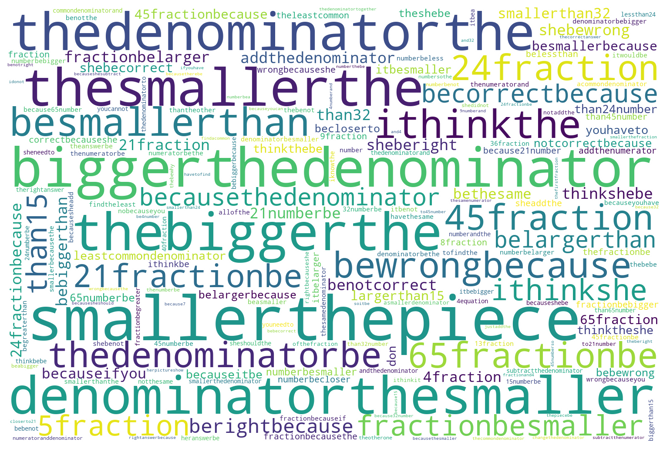

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2).generate(info_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

## without stop word

In [188]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
for i in range(len(data)):
    temp_list=data.word_list.iloc[i]
    temp_new_list=[word for word in temp_list if word not in stoplist]
    data.word_list.iloc[i]=temp_new_list

D:\anaconda\envs\ntds\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [193]:
comb_dict={}
data['ngrams_answer']=''
for i in range(len(data)):
    temp_answer=''
    for word_comb in ngrams(data.word_list.iloc[i],3):
        temp_comb=''
        temp_words=''
        for temp_word in word_comb:
            temp_comb=temp_comb+temp_word
            temp_words=temp_words+temp_word+' '
        comb_dict[temp_comb]=temp_words[:-1]
        temp_answer=temp_answer+temp_comb+' '
    data['ngrams_answer'].iloc[i]=temp_answer[:-1]

In [194]:
f_train = data.iloc[:1399][ 'ngrams_answer'].values
c_train = data.iloc[:1399]['correctness'].values
at_train = data.iloc[:1399][ 'answerType'].values
f_test = data.iloc[1400:][ 'ngrams_answer'].values
c_test = data.iloc[1400:]['correctness'].values
at_test = data.iloc[1400:]['answerType'].values

In [195]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [196]:
def get_tfidf_dic(array):
    temp_dict={}
    names=vectorizer.get_feature_names()
    for i in range(len(names)):
        temp_dict[names[i]]=array[i]
    return temp_dict

In [197]:
train_set=[(get_tfidf_dic(train_vectors.toarray()[i]), at_train[i])  for i in range(train_vectors.shape[0])]

In [198]:
dt_cls=nltk.NaiveBayesClassifier.train(train_set)

In [199]:
dt_cls.show_most_informative_features(5)

Most Informative Features
   thinkrightdenominator = 0.4022224658535533      v : p      =     11.6 : 1.0
           thinkwrongadd = 0.7331257432489677      u : p      =     10.8 : 1.0
     wrongadddenominator = 0.6800931146436117      u : p      =     10.5 : 1.0
 denominatorsmallerpiece = 0.7375615429663952      c : p      =      4.5 : 1.0
biggerdenominatorsmaller = 0.6752799199865419      c : p      =      4.5 : 1.0


In [200]:
info_f=dt_cls.most_informative_features(1000)

In [201]:
info_fs=[]
for temp in info_f:
    temp_comb=temp[0]
    try:
        info_fs.append(comb_dict[temp_comb])
    except:
        continue

In [202]:
info_fs

['think right denominator',
 'think wrong add',
 'wrong add denominator',
 'denominator smaller piece',
 'bigger denominator smaller',
 'denominator bigger make',
 'least common denominator',
 'find least common',
 'smaller denominator bigger',
 'find common denominator',
 'add numerator denominator',
 'wrong add denominator',
 'fraction smaller denominator',
 'think wrong add',
 'bigger denominator smaller',
 'common denominator add',
 'cut smaller piece',
 'common denominator subtract',
 'denominator bigger fraction',
 'wrong add numerator',
 'denominator smaller fraction',
 'never add denominator',
 'smaller denominator smaller',
 'add denominator never',
 'make common denominator',
 'denominator smaller denominator',
 'fraction larger denominator',
 'smaller denominator larger',
 'fraction bigger denominator',
 'denominator smaller piece',
 'think right think',
 'correct add denominator',
 'denominator subtract numerator',
 'numerator denominator together',
 'get correct answer',
 

In [203]:
info_fs=[temp[0] for temp in info_f]

In [204]:
info_text=''
for temp_word in info_fs:
    info_text=info_text+temp_word+' '

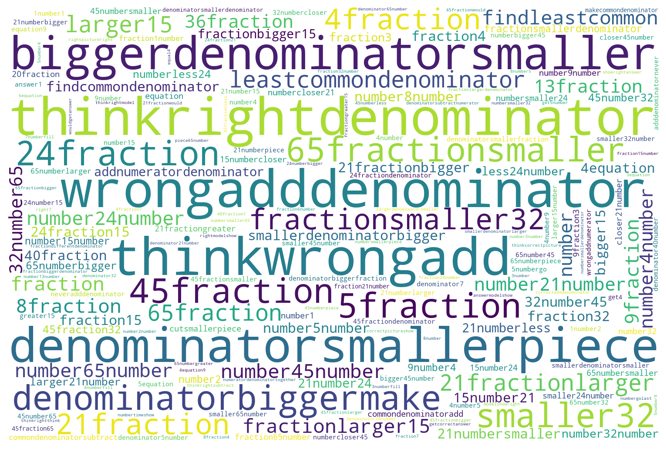

In [205]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2).generate(info_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

#  most informative features in classification: 2 ngrams

In [37]:
comb_dict={}
data['ngrams_answer']=''
for i in range(len(data)):
    temp_answer=''
    for word_comb in ngrams(data.word_list.iloc[i],2):
        temp_comb=''
        temp_words=''
        for temp_word in word_comb:
            temp_comb=temp_comb+temp_word
            temp_words=temp_words+temp_word+' '
        comb_dict[temp_comb]=temp_words[:-1]
        temp_answer=temp_answer+temp_comb+' '
    data['ngrams_answer'].iloc[i]=temp_answer[:-1]

D:\anaconda\envs\ntds\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
f_train = data.iloc[:1399][ 'ngrams_answer'].values
c_train = data.iloc[:1399]['correctness'].values
at_train = data.iloc[:1399][ 'answerType'].values
f_test = data.iloc[1400:][ 'ngrams_answer'].values
c_test = data.iloc[1400:]['correctness'].values
at_test = data.iloc[1400:]['answerType'].values

In [39]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [40]:
train_set=[(get_tfidf_dic(train_vectors.toarray()[i]), at_train[i])  for i in range(train_vectors.shape[0])]
dt_cls=nltk.NaiveBayesClassifier.train(train_set)

In [41]:
dt_cls.show_most_informative_features(5)

Most Informative Features
                thepiece = 0.42762468989510805      c : p      =     11.4 : 1.0
               biggerthe = 0.41556337927083015      c : p      =     11.3 : 1.0
               thebigger = 0.4136921609574848      c : p      =     11.3 : 1.0
              smallerthe = 0.3967425069774062      c : p      =     11.2 : 1.0
          denominatorthe = 0.36863231989994033      c : p      =     10.9 : 1.0


In [42]:
info_f=dt_cls.most_informative_features(1000)
info_fs=[]
for temp in info_f:
    temp_comb=temp[0]
    try:
        info_fs.append(comb_dict[temp_comb])
    except:
        continue
info_fs

['the piece',
 'bigger the',
 'the bigger',
 'smaller the',
 'denominator the',
 'the smaller',
 'the denominator',
 'i think',
 'the piece',
 'bigger the',
 'the bigger',
 'smaller the',
 'denominator the',
 'the smaller',
 'she be',
 'because the',
 'it be',
 'fraction be',
 'because the',
 'the denominator',
 'the denominator',
 'number be',
 'think the',
 'be smaller',
 'be not',
 'the be',
 'be larger',
 'the fraction',
 'be bigger',
 'the same',
 'fraction because',
 'be wrong',
 'correct because',
 'be the',
 'the numerator',
 'denominator be',
 'because she',
 'be right',
 'be correct',
 'smaller than',
 'wrong because',
 'if you',
 'add the',
 'common denominator',
 'number and',
 'right because',
 'than 15',
 'and the',
 'think she',
 'be be',
 'because you',
 'larger than',
 'the she',
 'be a',
 'than 32',
 'because it',
 'would be',
 'you have',
 'no because',
 'she should',
 'fraction and',
 'in the',
 'of the',
 'the answer',
 'have to',
 'smaller because',
 'answer be',


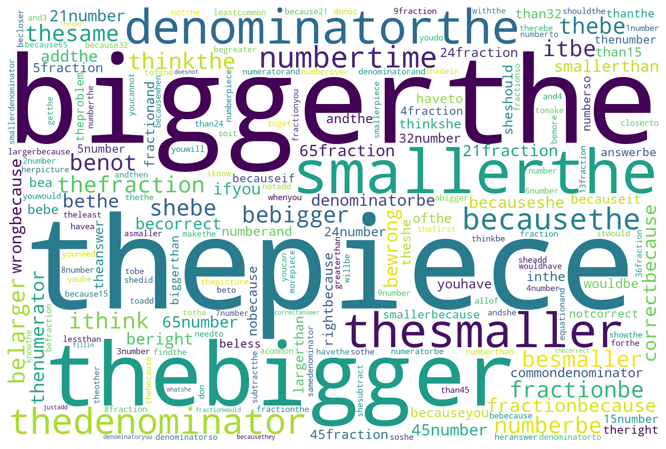

In [43]:
from wordcloud import WordCloud
info_fs=[temp[0] for temp in info_f]
info_text=''
for temp_word in info_fs:
    info_text=info_text+temp_word+' '
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2).generate(info_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

## without stop word

In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
for i in range(len(data)):
    temp_list=data.word_list.iloc[i]
    temp_new_list=[word for word in temp_list if word not in stoplist]
    data.word_list.iloc[i]=temp_new_list

In [206]:
comb_dict={}
data['ngrams_answer']=''
for i in range(len(data)):
    temp_answer=''
    for word_comb in ngrams(data.word_list.iloc[i],2):
        temp_comb=''
        temp_words=''
        for temp_word in word_comb:
            temp_comb=temp_comb+temp_word
            temp_words=temp_words+temp_word+' '
        comb_dict[temp_comb]=temp_words[:-1]
        temp_answer=temp_answer+temp_comb+' '
    data['ngrams_answer'].iloc[i]=temp_answer[:-1]

D:\anaconda\envs\ntds\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [207]:
f_train = data.iloc[:1399][ 'ngrams_answer'].values
c_train = data.iloc[:1399]['correctness'].values
at_train = data.iloc[:1399][ 'answerType'].values
f_test = data.iloc[1400:][ 'ngrams_answer'].values
c_test = data.iloc[1400:]['correctness'].values
at_test = data.iloc[1400:]['answerType'].values

In [208]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [209]:
train_set=[(get_tfidf_dic(train_vectors.toarray()[i]), at_train[i])  for i in range(train_vectors.shape[0])]

In [210]:
dt_cls=nltk.NaiveBayesClassifier.train(train_set)

In [211]:
dt_cls.show_most_informative_features(5)

Most Informative Features
                wrongadd = 0.6421473010036575      u : p      =      9.7 : 1.0
              thinkwrong = 0.5598538956378383      u : p      =      8.6 : 1.0
          adddenominator = 0.5236510855071864      u : p      =      8.1 : 1.0
            smallerpiece = 0.6154170570396422      c : p      =      4.3 : 1.0
       biggerdenominator = 0.5968654556731604      c : p      =      4.3 : 1.0


In [212]:
info_f=dt_cls.most_informative_features(1000)

In [213]:
info_fs=[]
for temp in info_f:
    temp_comb=temp[0]
    try:
        info_fs.append(comb_dict[temp_comb])
    except:
        continue

In [214]:
info_fs

['wrong add',
 'think wrong',
 'add denominator',
 'smaller piece',
 'bigger denominator',
 'denominator smaller',
 'one bigger',
 'bigger make',
 'denominator bigger',
 'fraction smaller',
 'common denominator',
 'smaller 32',
 'fraction larger',
 'think right',
 'number smaller',
 'add denominator',
 'larger 15',
 'think wrong',
 'smaller denominator',
 'denominator smaller',
 'fraction bigger',
 'least common',
 'think correct',
 'fraction would',
 'numerator denominator',
 'denominator bigger',
 'fraction denominator',
 'number bigger',
 'add numerator',
 'number fraction',
 'smaller piece',
 'number 45',
 'number piece',
 'find least',
 'bigger denominator',
 'number 24',
 'wrong add',
 'number larger',
 'number 4',
 'number 65',
 'fraction fraction',
 'number 21',
 'fraction 15',
 'think answer',
 'number 32',
 'number closer',
 'denominator add',
 'number would',
 'smaller fraction',
 'fraction 4',
 'number get',
 'number denominator',
 'bigger fraction',
 'correct answer',
 'de

In [215]:
info_fs=[temp[0] for temp in info_f]

In [216]:
info_text=''
for temp_word in info_fs:
    info_text=info_text+temp_word+' '

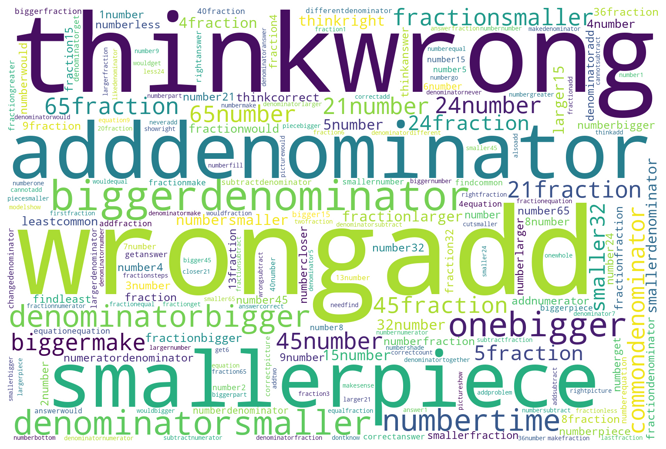

In [217]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2).generate(info_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

#  most informative features in classification: 4 ngrams

In [44]:
comb_dict={}
data['ngrams_answer']=''
for i in range(len(data)):
    temp_answer=''
    for word_comb in ngrams(data.word_list.iloc[i],4):
        temp_comb=''
        temp_words=''
        for temp_word in word_comb:
            temp_comb=temp_comb+temp_word
            temp_words=temp_words+temp_word+' '
        comb_dict[temp_comb]=temp_words[:-1]
        temp_answer=temp_answer+temp_comb+' '
    data['ngrams_answer'].iloc[i]=temp_answer[:-1]

D:\anaconda\envs\ntds\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
f_train = data.iloc[:1399][ 'ngrams_answer'].values
c_train = data.iloc[:1399]['correctness'].values
at_train = data.iloc[:1399][ 'answerType'].values
f_test = data.iloc[1400:][ 'ngrams_answer'].values
c_test = data.iloc[1400:]['correctness'].values
at_test = data.iloc[1400:]['answerType'].values

In [46]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [47]:
train_set=[(get_tfidf_dic(train_vectors.toarray()[i]), at_train[i])  for i in range(train_vectors.shape[0])]
dt_cls=nltk.NaiveBayesClassifier.train(train_set)

In [48]:
dt_cls.show_most_informative_features(5)

Most Informative Features
    notcorrectbecauseshe = 0.3093567427155532      u : p      =     10.7 : 1.0
         shebenotcorrect = 0.3093567427155532      u : p      =     10.7 : 1.0
     benotcorrectbecause = 0.2512169080136046      u : p      =      9.2 : 1.0
      thesmallerthepiece = 0.4823332381246426      c : p      =      7.5 : 1.0
 biggerthedenominatorthe = 0.4756297987296272      c : p      =      7.5 : 1.0


In [49]:
info_f=dt_cls.most_informative_features(1000)
info_fs=[]
for temp in info_f:
    temp_comb=temp[0]
    try:
        info_fs.append(comb_dict[temp_comb])
    except:
        continue
info_fs

['not correct because she',
 'she be not correct',
 'be not correct because',
 'the smaller the piece',
 'bigger the denominator the',
 'the bigger the denominator',
 'the denominator the smaller',
 'denominator the smaller the',
 'i think she be',
 'be smaller than 32',
 'be larger than 15',
 'because the denominator be',
 'she be wrong because',
 'i think the she',
 'be not correct because',
 'she be correct because',
 'i think the be',
 'the least common denominator',
 'she be right because',
 'be be wrong because',
 'think the she be',
 'be wrong because she',
 'it be smaller because',
 'number be closer to',
 'number be smaller than',
 'find the least common',
 'it be larger because',
 'she add the denominator',
 'the denominator be smaller',
 'be wrong because you',
 'think the be be',
 'the denominator be bigger',
 'numerator be the same',
 'be correct because she',
 'be smaller than the',
 'because you have to',
 'think she be wrong',
 'the she be right',
 'the be be wrong',
 '

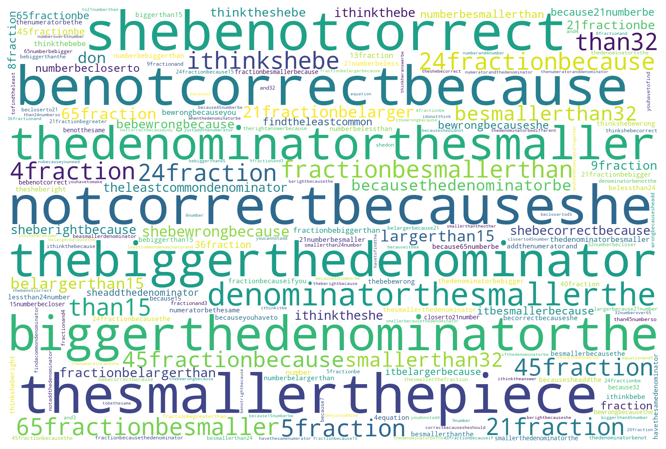

In [50]:
from wordcloud import WordCloud
info_fs=[temp[0] for temp in info_f]
info_text=''
for temp_word in info_fs:
    info_text=info_text+temp_word+' '
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2).generate(info_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

## without stop word

In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
for i in range(len(data)):
    temp_list=data.word_list.iloc[i]
    temp_new_list=[word for word in temp_list if word not in stoplist]
    data.word_list.iloc[i]=temp_new_list

In [218]:
comb_dict={}
data['ngrams_answer']=''
for i in range(len(data)):
    temp_answer=''
    for word_comb in ngrams(data.word_list.iloc[i],4):
        temp_comb=''
        temp_words=''
        for temp_word in word_comb:
            temp_comb=temp_comb+temp_word
            temp_words=temp_words+temp_word+' '
        comb_dict[temp_comb]=temp_words[:-1]
        temp_answer=temp_answer+temp_comb+' '
    data['ngrams_answer'].iloc[i]=temp_answer[:-1]

D:\anaconda\envs\ntds\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [219]:
f_train = data.iloc[:1399][ 'ngrams_answer'].values
c_train = data.iloc[:1399]['correctness'].values
at_train = data.iloc[:1399][ 'answerType'].values
f_test = data.iloc[1400:][ 'ngrams_answer'].values
c_test = data.iloc[1400:]['correctness'].values
at_test = data.iloc[1400:]['answerType'].values

In [220]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [221]:
train_set=[(get_tfidf_dic(train_vectors.toarray()[i]), at_train[i])  for i in range(train_vectors.shape[0])]
dt_cls=nltk.NaiveBayesClassifier.train(train_set)

In [222]:
dt_cls.show_most_informative_features(5)

Most Informative Features
thinkwrongadddenominator = 1.0                 u : p      =     11.2 : 1.0
biggerdenominatorsmallerpiece = 1.0                 c : p      =      4.5 : 1.0
                      15 = 0.1626546095734269      c : p      =      2.9 : 1.0
                      32 = 0.0                 p : u      =      1.6 : 1.0
                      15 = 0.0                 p : u      =      1.6 : 1.0


In [223]:
info_f=dt_cls.most_informative_features(1000)
info_fs=[]
for temp in info_f:
    temp_comb=temp[0]
    try:
        info_fs.append(comb_dict[temp_comb])
    except:
        continue
info_fs

['think wrong add denominator',
 'bigger denominator smaller piece',
 'find least common denominator',
 'wrong add numerator denominator',
 'think wrong add denominator',
 'add numerator denominator together',
 'least common denominator add',
 'think right model show',
 'smaller denominator bigger fraction',
 'find common denominator subtract',
 'common denominator subtract numerator',
 'add numerator denominator get',
 'smaller denominator bigger piece',
 'would help really answer',
 'help really answer question',
 'find common denominator add',
 'denominator never add denominator',
 'add denominator never add',
 'common denominator add get',
 'denominator together get answer',
 'numerator together denominator together',
 'need find common denominator',
 'fraction smaller denominator smaller',
 'add fraction different denominator',
 'bigger denominator smaller piece',
 'least common denominator two',
 'wrong find least common',
 'least common denominator fraction',
 'fraction find lea

In [224]:
info_fs=[temp[0] for temp in info_f]

In [225]:
info_text=''
for temp_word in info_fs:
    info_text=info_text+temp_word+' '

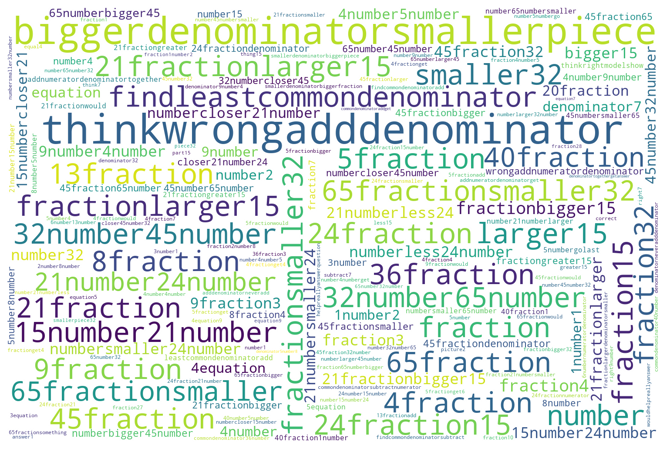

In [226]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2).generate(info_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

#  most informative features in classification: 5 ngrams

In [51]:
comb_dict={}
data['ngrams_answer']=''
for i in range(len(data)):
    temp_answer=''
    for word_comb in ngrams(data.word_list.iloc[i],5):
        temp_comb=''
        temp_words=''
        for temp_word in word_comb:
            temp_comb=temp_comb+temp_word
            temp_words=temp_words+temp_word+' '
        comb_dict[temp_comb]=temp_words[:-1]
        temp_answer=temp_answer+temp_comb+' '
    data['ngrams_answer'].iloc[i]=temp_answer[:-1]

D:\anaconda\envs\ntds\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
f_train = data.iloc[:1399][ 'ngrams_answer'].values
c_train = data.iloc[:1399]['correctness'].values
at_train = data.iloc[:1399][ 'answerType'].values
f_test = data.iloc[1400:][ 'ngrams_answer'].values
c_test = data.iloc[1400:]['correctness'].values
at_test = data.iloc[1400:]['answerType'].values

In [53]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [54]:
train_set=[(get_tfidf_dic(train_vectors.toarray()[i]), at_train[i])  for i in range(train_vectors.shape[0])]
dt_cls=nltk.NaiveBayesClassifier.train(train_set)
dt_cls.show_most_informative_features(5)

Most Informative Features
  shebenotcorrectbecause = 0.32946972612874426      u : p      =     10.8 : 1.0
  benotcorrectbecauseshe = 0.32162080274233756      u : p      =     10.7 : 1.0
denominatorthesmallerthepiece = 0.5274497959283755      c : p      =      7.5 : 1.0
thebiggerthedenominatorthe = 0.5112647984000182      c : p      =      7.5 : 1.0
biggerthedenominatorthesmaller = 0.5112647984000182      c : p      =      7.5 : 1.0


In [55]:
info_f=dt_cls.most_informative_features(1000)
info_fs=[]
for temp in info_f:
    temp_comb=temp[0]
    try:
        info_fs.append(comb_dict[temp_comb])
    except:
        continue
info_fs

['she be not correct because',
 'be not correct because she',
 'denominator the smaller the piece',
 'the bigger the denominator the',
 'bigger the denominator the smaller',
 'the denominator the smaller the',
 'i think the she be',
 'find the least common denominator',
 'i think the be be',
 'i think she be wrong',
 'the she be right because',
 'think she be wrong because',
 'i think she be right',
 'the numerator be the same',
 'the be be wrong because',
 'the denominator the smaller the',
 'be be wrong because she',
 'she be wrong because she',
 'be not correct because she',
 'she be correct because she',
 'think the she be right',
 'because she add the denominator',
 'she be wrong because you',
 'think the be be wrong',
 'she be not correct because',
 'the smaller the denominator the',
 'i think she be correct',
 'to find the least common',
 'think she be right because',
 'because the denominator be smaller',
 'because the denominator be not',
 'denominator be not the same',
 'the 

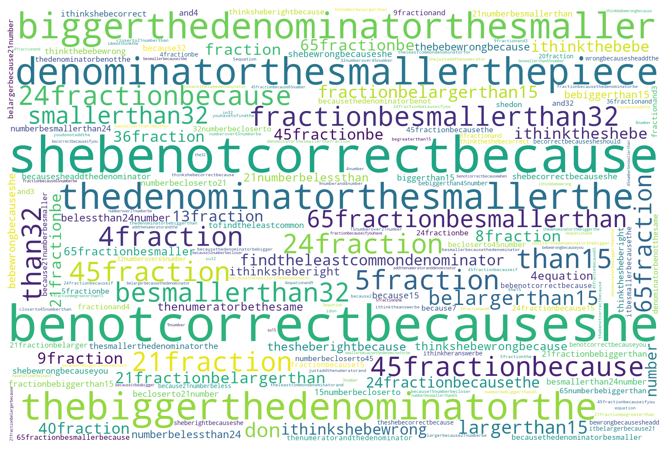

In [56]:
from wordcloud import WordCloud
info_fs=[temp[0] for temp in info_f]
info_text=''
for temp_word in info_fs:
    info_text=info_text+temp_word+' '
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2).generate(info_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

## without stop word

In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
for i in range(len(data)):
    temp_list=data.word_list.iloc[i]
    temp_new_list=[word for word in temp_list if word not in stoplist]
    data.word_list.iloc[i]=temp_new_list

In [227]:
comb_dict={}
data['ngrams_answer']=''
for i in range(len(data)):
    temp_answer=''
    for word_comb in ngrams(data.word_list.iloc[i],5):
        temp_comb=''
        temp_words=''
        for temp_word in word_comb:
            temp_comb=temp_comb+temp_word
            temp_words=temp_words+temp_word+' '
        comb_dict[temp_comb]=temp_words[:-1]
        temp_answer=temp_answer+temp_comb+' '
    data['ngrams_answer'].iloc[i]=temp_answer[:-1]

D:\anaconda\envs\ntds\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [228]:
f_train = data.iloc[:1399][ 'ngrams_answer'].values
c_train = data.iloc[:1399]['correctness'].values
at_train = data.iloc[:1399][ 'answerType'].values
f_test = data.iloc[1400:][ 'ngrams_answer'].values
c_test = data.iloc[1400:]['correctness'].values
at_test = data.iloc[1400:]['answerType'].values

In [229]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [230]:
train_set=[(get_tfidf_dic(train_vectors.toarray()[i]), at_train[i])  for i in range(train_vectors.shape[0])]
dt_cls=nltk.NaiveBayesClassifier.train(train_set)

In [231]:
dt_cls.show_most_informative_features(5)

Most Informative Features
              fraction15 = 0.1859196341383027      c : p      =      3.2 : 1.0
            24fraction15 = 0.546782557845561      c : p      =      3.2 : 1.0
                      21 = 0.15185905721491927      c : p      =      3.1 : 1.0
        fractionlarger15 = 0.14975378803734407      c : p      =      3.1 : 1.0
              21fraction = 0.14841799619277113      c : p      =      3.1 : 1.0


In [232]:
info_f=dt_cls.most_informative_features(1000)
info_fs=[]
for temp in info_f:
    temp_comb=temp[0]
    try:
        info_fs.append(comb_dict[temp_comb])
    except:
        continue
info_fs

['find least common denominator add',
 'would help really answer question',
 'add denominator never add denominator',
 'least common denominator add get',
 'wrong add numerator denominator together',
 'find least common denominator two',
 'fraction find least common denominator',
 'wrong find least common denominator',
 'need find least common denominator',
 'answer correct count numerator denominator',
 'part one denominator see many',
 'would gotten really answer question',
 'understand picture try would gotten',
 'think correct picture show right',
 'answer model show thing form',
 'shade therefore problem make sense',
 'right answer model show right',
 'part correctly shade number numerator',
 'think right idea wrong explain',
 'think right subtract right picture',
 'problem problem would explain steps',
 'think answer correct count numerator',
 'seven shade one three shade',
 'work right work add subtract',
 'take time count correctly say',
 'add two fraction steps name',
 'think 

In [233]:
info_fs=[temp[0] for temp in info_f]

In [234]:
info_text=''
for temp_word in info_fs:
    info_text=info_text+temp_word+' '

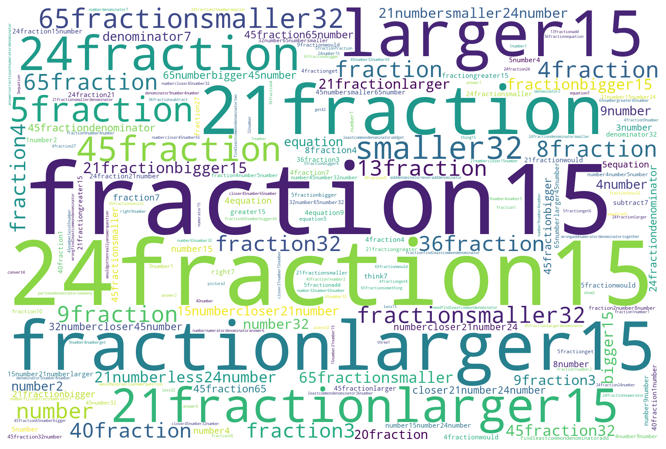

In [235]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2).generate(info_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis('off')
plt.show()

In [184]:
all_word_list=[]
for i in range(1400):
    temp_word_list=data.word_list.iloc[i]
    for temp_word in temp_word_list:
        all_word_list.append(temp_word)

In [185]:
def find_comb(comb):
    temp_cnt=0
    len_comb=len(comb)
    for i in range(len(all_word_list)):
        if all_word_list[i]==comb[0]:
            for j in range(len_comb-1):
                if all_word_list[i+j+1]!=comb[j+1]:
                    j=j-1
                    break
            if j==len_comb-2:
                temp_cnt+=1
    return temp_cnt

In [186]:
find_comb(['common','denominator'])

162

In [83]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
for i in range(len(data)):
    temp_list=data.word_list.iloc[i]
    temp_new_list=[word for word in temp_list if word not in stoplist]
    data.word_list.iloc[i]=temp_new_list
data['answer']=''
for i in range(len(data)):
    temp_word_list=data.word_list.iloc[i]
    temp_answer=''
    for temp_word in temp_word_list:
        temp_answer=temp_answer+temp_word+' '
    temp_answer=temp_answer[:-1]
    data['answer'].iloc[i]=temp_answer

In [84]:
tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 5))

In [85]:
f_train = data.iloc[:1399][ 'answer'].values
c_train = data.iloc[:1399]['correctness'].values
at_train = data.iloc[:1399][ 'answerType'].values
f_test = data.iloc[1400:][ 'answer'].values
c_test = data.iloc[1400:]['correctness'].values
at_test = data.iloc[1400:]['answerType'].values

In [86]:
train_vectors = tfidf.fit_transform(f_train)
test_vectors = tfidf.transform(f_test)

In [87]:
def get_tfidf_dic(array):
    temp_dict={}
    names=tfidf.get_feature_names()
    for i in range(len(names)):
        temp_dict[names[i]]=array[i]
    return temp_dict

In [88]:
train_set=[(get_tfidf_dic(train_vectors.toarray()[i]), at_train[i])  for i in range(train_vectors.shape[0])]

In [89]:
dt_cls=nltk.NaiveBayesClassifier.train(train_set)
dt_cls.show_most_informative_features(20)

Most Informative Features
think wrong add denominator = 0.458933330927495      u : p      =     11.2 : 1.0
         think wrong add = 0.425400723322315      u : p      =     10.8 : 1.0
   wrong add denominator = 0.3910976081284401      u : p      =     10.5 : 1.0
               wrong add = 0.34961803118402474      u : p      =      9.7 : 1.0
             think wrong = 0.30657785753414263      u : p      =      8.6 : 1.0
         add denominator = 0.2867530781532194      u : p      =      8.0 : 1.0
                   wrong = 0.22628182433437047      u : p      =      5.9 : 1.0
                     add = 0.21497691659035614      u : p      =      5.3 : 1.0
                   think = 0.20395842295824002      u : p      =      5.0 : 1.0
bigger denominator smaller piece = 0.46137559678286544      c : p      =      4.5 : 1.0
denominator smaller piece = 0.42503995444320697      c : p      =      4.5 : 1.0
bigger denominator smaller = 0.3891484706118544      c : p      =      4.5 : 1.0
       

In [90]:
dt_cls.show_most_informative_features(1000)

Most Informative Features
think wrong add denominator = 0.458933330927495      u : p      =     11.2 : 1.0
         think wrong add = 0.425400723322315      u : p      =     10.8 : 1.0
   wrong add denominator = 0.3910976081284401      u : p      =     10.5 : 1.0
               wrong add = 0.34961803118402474      u : p      =      9.7 : 1.0
             think wrong = 0.30657785753414263      u : p      =      8.6 : 1.0
         add denominator = 0.2867530781532194      u : p      =      8.0 : 1.0
                   wrong = 0.22628182433437047      u : p      =      5.9 : 1.0
                     add = 0.21497691659035614      u : p      =      5.3 : 1.0
                   think = 0.20395842295824002      u : p      =      5.0 : 1.0
bigger denominator smaller piece = 0.46137559678286544      c : p      =      4.5 : 1.0
denominator smaller piece = 0.42503995444320697      c : p      =      4.5 : 1.0
bigger denominator smaller = 0.3891484706118544      c : p      =      4.5 : 1.0
       

        model show right = 0.0                 p : v      =      1.0 : 1.0
      fraction correctly = 0.0                 p : v      =      1.0 : 1.0
            one equation = 0.0                 p : v      =      1.0 : 1.0
              right show = 0.0                 p : v      =      1.0 : 1.0
       think right model = 0.0                 p : v      =      1.0 : 1.0
             number next = 0.0                 p : v      =      1.0 : 1.0
       show right answer = 0.0                 p : v      =      1.0 : 1.0
               time show = 0.0                 p : v      =      1.0 : 1.0
           solve problem = 0.0                 p : v      =      1.0 : 1.0
                   eight = 0.0                 p : v      =      1.0 : 1.0
     number equal number = 0.0                 p : v      =      1.0 : 1.0
    think right subtract = 0.0                 p : v      =      1.0 : 1.0
       right denominator = 0.0                 p : v      =      1.0 : 1.0
24 fraction 15 24 fractio

          65 fraction 32 = 0.0                 p : u      =      1.0 : 1.0
    together denominator = 0.0                 p : u      =      1.0 : 1.0
     add denominator get = 0.0                 p : u      =      1.0 : 1.0
          would multiply = 0.0                 p : u      =      1.0 : 1.0
          equation right = 0.0                 p : u      =      1.0 : 1.0
  add numerator together = 0.0                 p : u      =      1.0 : 1.0
             wrong would = 0.0                 p : u      =      1.0 : 1.0
   45 fraction 32 number = 0.0                 p : u      =      1.0 : 1.0
       32 65 fraction 32 = 0.0                 p : u      =      1.0 : 1.0
numerator denominator get = 0.0                 p : u      =      1.0 : 1.0
32 45 fraction 32 number = 0.0                 p : u      =      1.0 : 1.0
              two number = 0.0                 p : v      =      1.0 : 1.0
   number smaller number = 0.0                 p : v      =      1.0 : 1.0
smaller bigger denominat

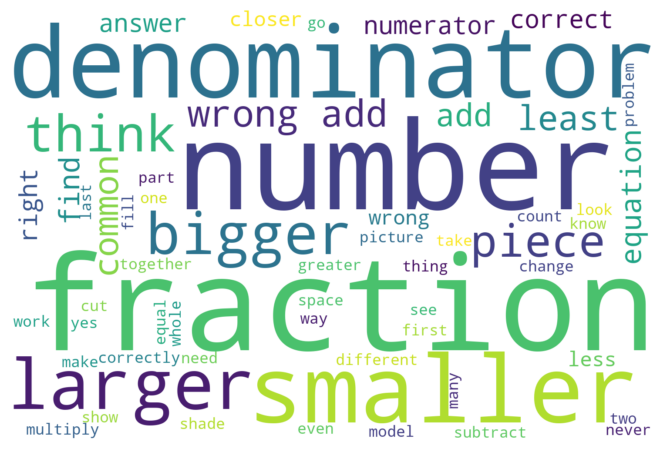

In [91]:
info_f=dt_cls.most_informative_features(200)
info_fs=[temp[0] for temp in info_f]
info_text=''
for temp_word in info_fs:
    info_text=info_text+temp_word+' '
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2).generate(info_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation="bilinear",vmax=1000)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 10
for cat, cat_id in sorted(cat_to_id.items()):
    features_chi2 = chi2(features, labels == cat_id)
    indices = np.argsort(features_chi2[0])    
    feature_names = np.array(tfidf.get_feature_names())[indices]    
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]    
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
        print("# '{}':".format(cat))    
        print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))    
        print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))


In [58]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(n_features=20)